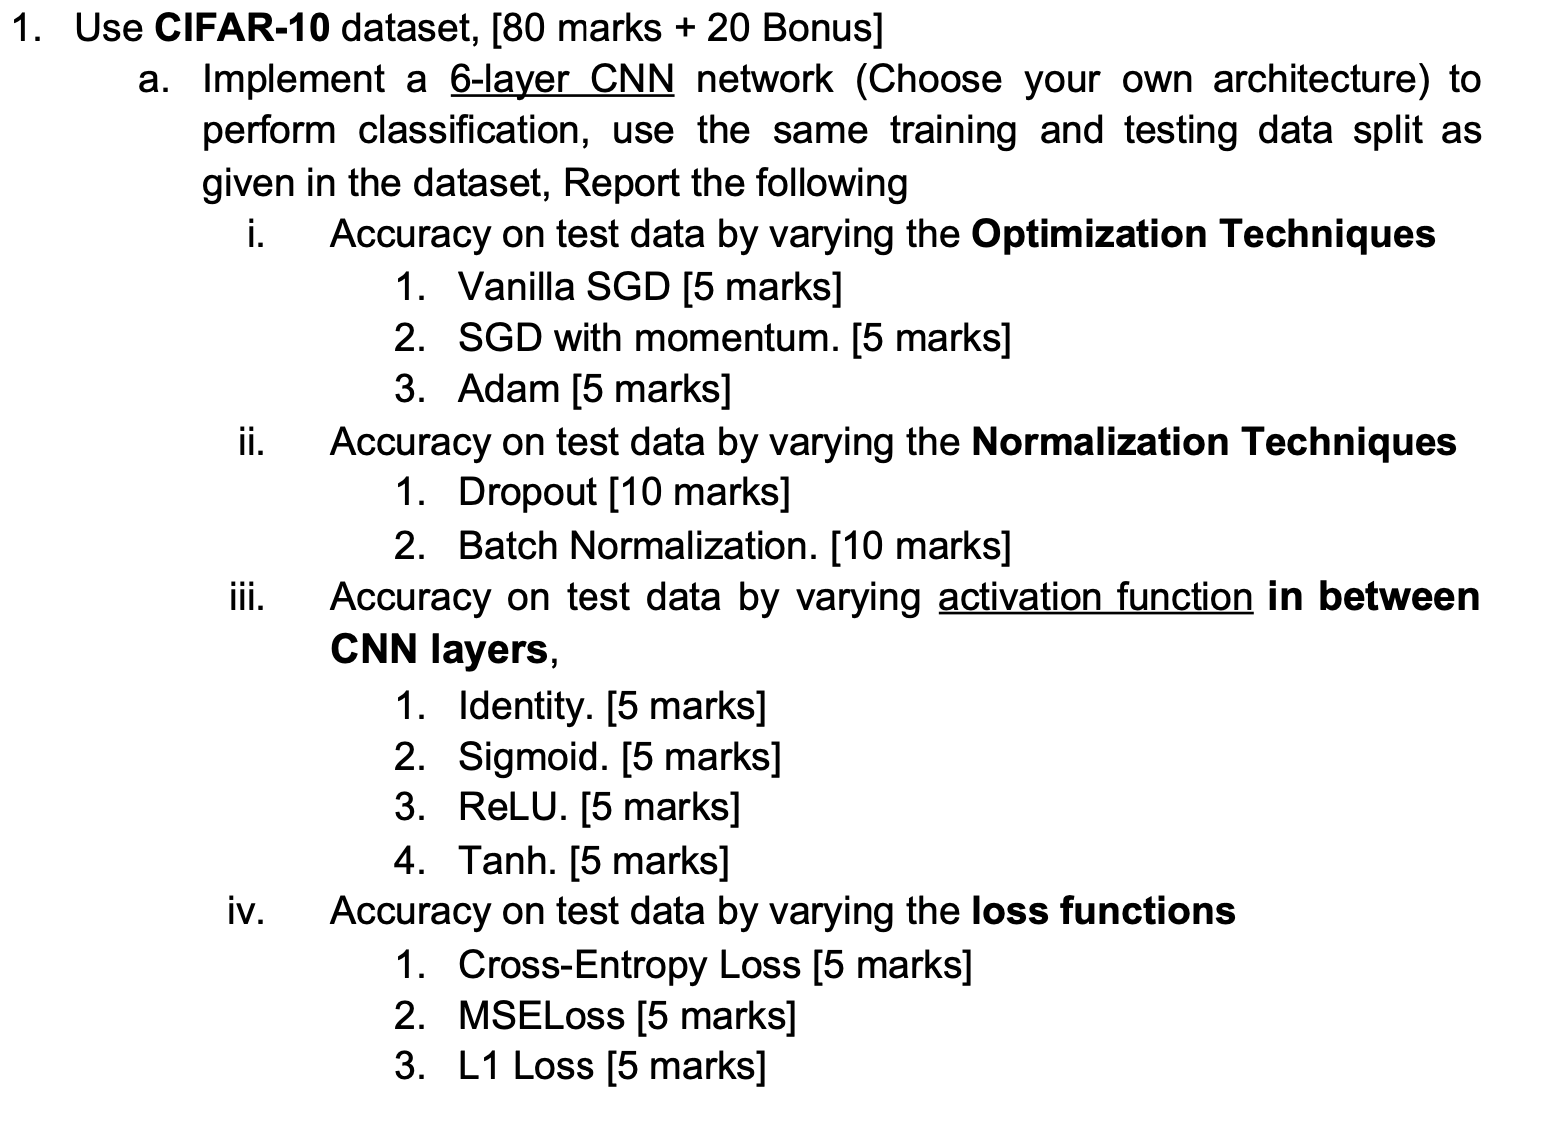

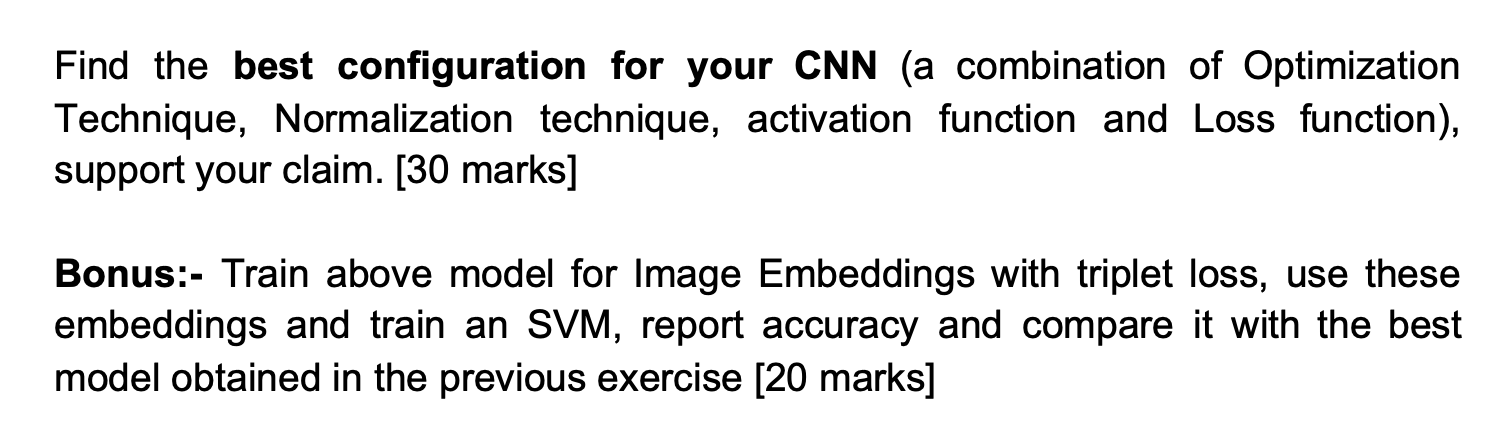

Dataset link - https://www.cs.toronto.edu/~kriz/cifar.html

https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

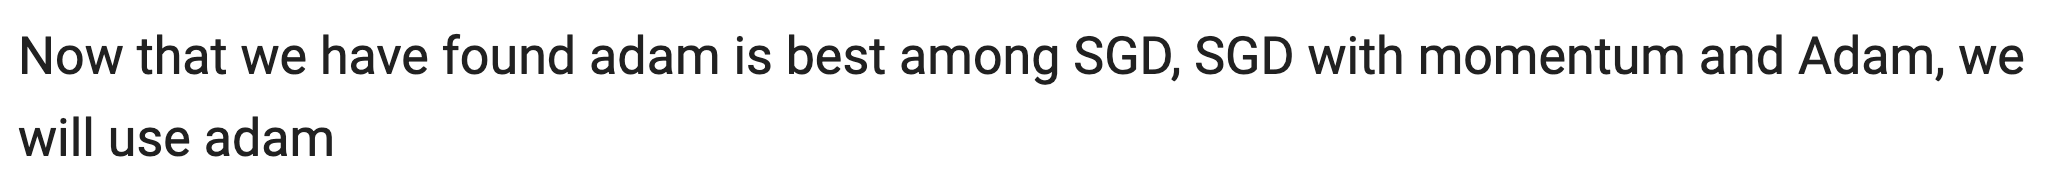

In [1]:
# # 1https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
# print("which optimizer you want to use: 1 for Vanilla SGD, 2 for SGD with momentum, 3 for Adam")
# user_optim = int(input())
# # print(user_optim)
# print("which normalization technique you want to use: 1 for dropout, 2 for batch norm")
# user_norm = int(input())
# # print(user_norm)
# print("which activation function you want to use: 1 for identity, 2 for sigmoid, 3 for relu, 4 for Tanh")
# user_activation = int(input())
# # print(user_activation)1
# print("which loss function you want to use: 1 for CEL, 2 for MSE, 3 for L1")
# user_loss = int(input())
# # print(user_loss)

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F



In [3]:
# REF: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

Normalize image = (image - mean)/std

In [4]:
# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
# Ref: https://discuss.pytorch.org/t/understanding-transform-normalize/21730
# For normalization we have image = (image - mean)/std we pass mean and std as (0.5) for all
# When we do so, we get a range of (0-0.5)/0.5 = -1 to (0+0.5)/0.5 = 1
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


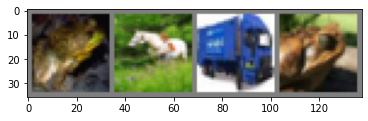

 frog horse truck  frog


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

print(image[0].size) = (32, 32)

We know that our input is 32X32.

# LeNet Theory: 

If we consider our Old friend, LeNet, Devised in 1998, which had error rate of 0.95% then we can think of using the CNN architecture in our problem. The vanilla LeNet takes 32X32 as input. It works as, input(32X32) -> Convolution -> Feature Maps -> Subsampling/Pooling -> Feature Maps -> Convolution -> Feature Maps -> FC3 -> output

The Lenet was made with the input as 32X32 so if the input images of size more than that, it had to scale down to 32X32. Moreover, if smaller than 32X32, then it had to be scaled up to 32X32 so that it is accepted by LeNet. And then, you had a convolution layer which in this case is shown as C1 using 6 Kernels with size 5X5 and convolution was performed with stride 1. As a result there are 6 kernels the layer generates 6 different feature maps. And the kernel size was 5X5 with stride one. So that it tells you that every feature map will be of size 28X28.

If we want to have the size of the feature maps same as input in that case we must have extra rows and columns which are known as padding. The values are usually 0 and hence 0 padding.

The formula to measure the sizes of output feature maps: 
[Floor(F-W)]/s + 1 which in our case will be (32-5)/1 + 1 = 28

The featue maps travel to ReLU which is a type of non linearity, and then we have subsampling/pooling layer. Now that we have pooling with average window size 2X2, stride = 2. Now again, we have a reduction of our feature map the calculated reduction: (28-2/2) + 1 = 14.

You get output feature map which is 14X14. So as we studied in theory, pooling reduces the dimensions of the feature maps by collecting local statisitics. Now this 6 feature maps of dimension 14X14 (overall dimension = 6X14X14) are passed to a conv layer and this second conv layer in this case (C3) has 16 kernels of size 5X5 and stride 1.

(14-5)/1 + 1 = 10.

Now when you are using 16 kernels to generate 16 feature maps, not every 6 feature maps from the prev input is passed over every kernel, rather it was a type of asymetrical connection. So a particular feature map is connected with other feature. So from 0 to 5 gets input from three consecutive feature maps of the previous layer.


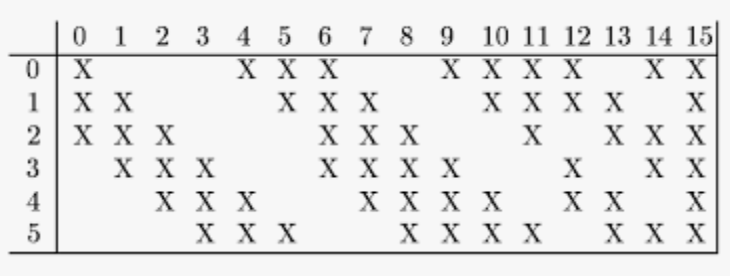

Also up to 11 every kernel gets 4 consecutive feature maps of the previous layer. And before that every kernel gets input from 3 consecutive inputs on that feature.

Break the symmetry in the network and keep the number of connections within the reasonable bonds.

Thus, (10-2)/2 +1 = 5

Outpur of pooling is 5X5.

Now we have FC layers, and purpose of such FC layers is to classify the input data. We have 3 such FC layers. Now from C5 to FC6 the non linearity used was tanh where as for the output non linearity used was softmax.

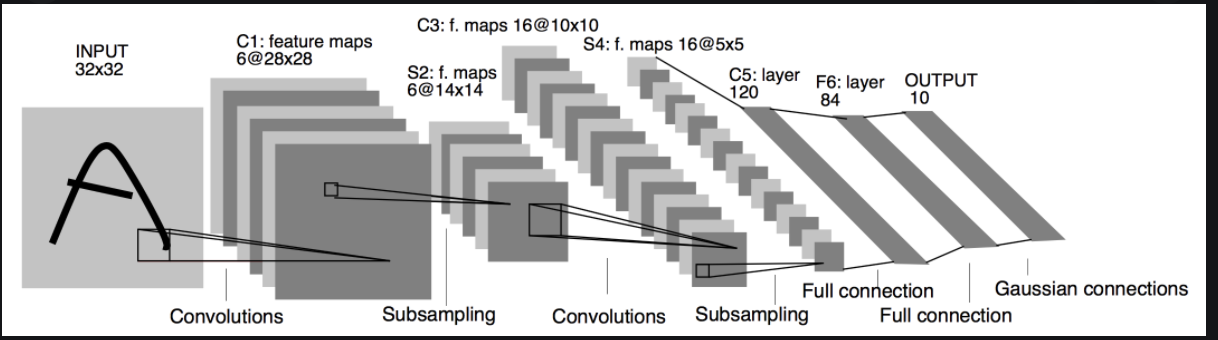

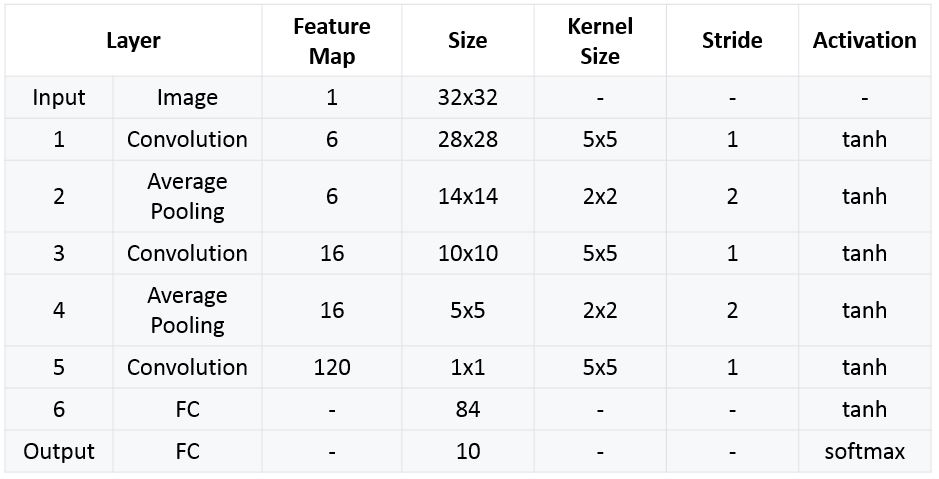

In [6]:

class LeNet(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(3, 6, 5, 1)
      self.conv2 = nn.Conv2d(6, 16, 5, 1)
      self.conv3 = nn.Conv2d(16, 120, 5, 1)
      self.fc1 = nn.Linear(120*1*1, 84)
      self.fc2 = nn.Linear(84,10)
    def forward(self, x):
      x = torch.tanh(self.conv1(x))
      x = F.max_pool2d(x,2,2)
      x = torch.tanh(self.conv2(x))
      x = F.max_pool2d(x,2,2)
      x = torch.tanh(self.conv3(x))
      # torch.Size([4, 120, 1, 1])
      x = x.view(-1, 120*1*1)
      x = torch.tanh(self.fc1(x))
      x = self.fc2(x)
      return x






In [7]:
net = LeNet()

In [8]:
net

LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)

In [9]:

import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)


In [10]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()
        # inputs = inputs
        # forward + backward + optimize
        outputs = net(inputs)
        # print(outputs[:,0].shape)
        # print(labels.shape)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.794
[1,  4000] loss: 1.591
[1,  6000] loss: 1.507
[1,  8000] loss: 1.438
[1, 10000] loss: 1.416
[1, 12000] loss: 1.377
[2,  2000] loss: 1.284
[2,  4000] loss: 1.303
[2,  6000] loss: 1.275
[2,  8000] loss: 1.302
[2, 10000] loss: 1.274
[2, 12000] loss: 1.269
Finished Training


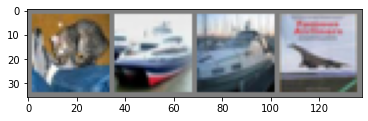

GroundTruth:    cat  ship  ship plane


In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
outputs = net(images)


In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat plane   car plane


In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [15]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 64 %
Accuracy of  bird : 47 %
Accuracy of   cat : 33 %
Accuracy of  deer : 35 %
Accuracy of   dog : 49 %
Accuracy of  frog : 72 %
Accuracy of horse : 64 %
Accuracy of  ship : 72 %
Accuracy of truck : 44 %
